# this notebook prepares the combined dataset

## Info file 

#### SIR-FORMAT_WIDE_NormalExtraction : contains SF galaxies

#### FS2_mock4EGG_type2_nh99_218_Lx42_out_col: catalog for type 2 AGN
#### FS2_mock4EGG_type2_nh99_218_Lx42_incidents_FastspecFormat: spectra for type 2 AGN

#### FS2+Mill_type1_fastspec_cat : catalog for type 1 AGN
#### FS2+Mill_type1_incidents_FastspecFormat : spectra for type 1 AGN


In [39]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import pickle
import glob


# Type 2 - 955 spectra

In [74]:
import os

# general path to the Type II AGN spectra
general_path_type2_mambo = '/Users/mginolfi/Projects/EUCLID/FS2_mock4EGG_type2_nh99_218_Lx42_incidents_FastspecFormat/out_spec_/'

# extract the filenames of the Type II AGN spectra
type2_filename = [f for f in os.listdir(general_path_type2_mambo) if f.endswith('.fits')]

# general path to catalog of the Type II AGN spectra
type2_mambo_cat = '/Users/mginolfi/Projects/EUCLID/FS2_mock4EGG_type2_nh99_218_Lx42_incidents_FastspecFormat/FS2_mock4EGG_type2_nh99_218_Lx42_general_WIDE.fits'

## extract wavelength axis in Angstrom

In [100]:
# take the wavelength axis of the first spectrum. I checked that all the spectra have the same wavelength axis. Also, the wavelength axis is the same for the Type I AGN spectra.
with fits.open(general_path_type2_mambo + type2_filename[2]) as hdu:
    wavelength_axis = hdu[1].data['wavelength']  

# Save the wavelength axis with pickle. Needed it so I can easily load it in the future.
with open('wavelength_axis.pkl', 'wb') as f:
    pickle.dump(wavelength_axis, f)

hdu[1].header # check that the wavelenfhgth is in Angstrom

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                  501 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'wavelength'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = 'D       '        

#####  in this cell we will extract the redshift, mass and flux of the Type II AGN spectra, and save them in a DataFrame. 
#### We need to check consistency between the catalog and the spectra files, and match the data accordingly. IDs are used to match the data. 

In [75]:
# open the type 2 catalog
hdu_type2_cat = fits.open(type2_mambo_cat)

# read IDs, redshit and mass from the catalog
catalog_ids = hdu_type2_cat[1].data['ID'] # Catalog IDs
catalog_z = hdu_type2_cat[1].data['Z_OBS']  # Redshift values
catalog_mass = hdu_type2_cat[1].data['mass']  # Mass values

# Prepare lists to collect the matched data
spectra_flux = []
log_m = []
redshift = []

# Convert catalog IDs to a set for quick lookup
catalog_id_to_index = {str(id): idx for idx, id in enumerate(catalog_ids)}

for filename in type2_filename:
    # Extract ID from filename (e.g., spec_59353603844390000.fits -> 59353603844390000)
    file_id = filename.split('_')[1].split('.')[0]

    # Check if this ID is in the catalog
    if file_id in catalog_id_to_index:
        # Get the corresponding index in the catalog
        cat_index = catalog_id_to_index[file_id]
        
        # Extract redshift and mass from the catalog
        z_obs = catalog_z[cat_index]
        mass = catalog_mass[cat_index]
        
        # Append redshift and mass to respective lists
        redshift.append(z_obs)
        log_m.append(mass)  # mass already in log scale in the catalog

        # Open the FITS file to get the flux data
        with fits.open(general_path_type2_mambo + filename) as hdu_type2_spectra:
            flux = hdu_type2_spectra[1].data['flux']  # Access the flux array
            spectra_flux.append(flux)  # Append the flux data to the list


# Create a DataFrame to hold the data, with an added 'type' column
reconstructed_type2_df = pd.DataFrame({
    'log_m': log_m,
    'z': redshift,
    'spectrum': spectra_flux,
    'type': 2  # Add 'type' column with a value of 2 (type 2 AGN); this will be useful later; alternatively, 
               #I could use a string 'type2', but better to use integers as I will use this column for training
})



# Save the DataFrame with pickle
with open('reconstructed_type2_data.pkl', 'wb') as f:
    pickle.dump(reconstructed_type2_df, f)


# Type 1  - 979 spectra

In [76]:
# read the filenames of the Type I AGN spectra

import os

# general path to the Type I AGN spectra
general_path_type1_mambo = '/Users/mginolfi/Projects/EUCLID/FS2+Mill_type1_incidents_FastspecFormat/out_spec_/'

# extract the filenames of the Type I AGN spectra
type1_filename = [f for f in os.listdir(general_path_type1_mambo) if f.endswith('.fits')]

# general path to catalog of the Type I AGN spectra
type1_mambo_cat = '/Users/mginolfi/Projects/EUCLID/FS2+Mill_type1_incidents_FastspecFormat/FS2+Mill_type1_general_WIDE.fits'


#####  in this cell we will extract the redshift, mass and flux of the Type II AGN spectra, and save them in a DataFrame. 
#### We need to check consistency between the catalog and the spectra files, and match the data accordingly. IDs are used to match the data. 

In [77]:
# open the type 1 catalog
hdu_type1_cat = fits.open(type1_mambo_cat)

# read IDs, redshift and mass from the catalog
catalog_ids = hdu_type1_cat[1].data['ID']  # Catalog IDs
catalog_z = hdu_type1_cat[1].data['Z_OBS']  # Redshift values
catalog_mass = hdu_type1_cat[1].data['mass']  # Mass values

# Prepare lists to collect the matched data
spectra_flux = []
log_m = []
redshift = []

# Convert catalog IDs to a set for quick lookup
catalog_id_to_index = {str(id): idx for idx, id in enumerate(catalog_ids)}

for filename in type1_filename:
    # Extract ID from filename (e.g., spec_59353603844390000.fits -> 59353603844390000)
    file_id = filename.split('_')[1].split('.')[0]

    # Check if this ID is in the catalog
    if file_id in catalog_id_to_index:
        # Get the corresponding index in the catalog
        cat_index = catalog_id_to_index[file_id]
        
        # Extract redshift and mass from the catalog
        z_obs = catalog_z[cat_index]
        mass = catalog_mass[cat_index]
        
        # Append redshift and mass to respective lists
        redshift.append(z_obs)
        log_m.append(mass)  # mass already in log scale in the catalog

        # Open the FITS file to get the flux data
        with fits.open(general_path_type1_mambo + filename) as hdu_type1_spectra:
            flux = hdu_type1_spectra[1].data['flux']  # Access the flux array
            spectra_flux.append(flux)  # Append the flux data to the list

# Create a DataFrame to hold the data, with an added 'type' column
reconstructed_type1_df = pd.DataFrame({
    'log_m': log_m,
    'z': redshift,
    'spectrum': spectra_flux,
    'type': 1  # Add 'type' column with a value of 1 (type 1 AGN); this will be useful later; alternatively, 
               #I could use a string 'type1', but better to use integers as I will use this column for training
})



# Save the DataFrame with pickle
with open('reconstructed_type1_data.pkl', 'wb') as f:
    pickle.dump(reconstructed_type1_df, f)


# Star-forming galaxies (TBD)

In [ ]:
sf_mambo = '/Volumes/recent_hd/Z-determination/

# combine dataframes 

In [79]:
# Load the two files
with open('reconstructed_type1_data.pkl', 'rb') as f1:
    reconstructed_type1_df = pickle.load(f1)
    
with open('reconstructed_type2_data.pkl', 'rb') as f2:
    reconstructed_type2_df = pickle.load(f2)

# Combine the two DataFrames
reconstructed_df = pd.concat([reconstructed_type1_df, reconstructed_type2_df], ignore_index=True)

# Save the combined DataFrame
with open('reconstructed_data.pkl', 'wb') as f:
    pickle.dump(reconstructed_df, f)


## check properties of simulated dataset

In [96]:
# Open the combined data file 
with open('reconstructed_data.pkl', 'rb') as f:
    reconstructed_df = pickle.load(f)


# Load the wavelength axis
with open('wavelength_axis.pkl', 'rb') as f:
    wavelength_axis = pickle.load(f)

### visualise random spectra (please give n as an argument in plot_random_spectra function)

In [111]:
# a list of emission lines and their rest wavelengths in Angstrom, to overlay on the spectra
emission_line_rest = {
    'Ly_alpha':1215.67,     # Lyman-alpha
    'NV':1240.81,           # Nitrogen-V
    'CIV':1549.48,           # Carbon IV
    'HeII_1':1640.0,         # Helium II
    'CIII':1908.72,          # Carbon III
    'CII':2326,              # Carbon II
    'NeIV':2424,             # Neon IV
    'MgII':2799.11,          # Magnesium II
    'NeV':3426.03,           # Neon V
    'OII':3727.0,            # Oxygen II
    'NeIII':3868.76,         # Neon III
    'Hdelta':4101.73,        # Hydrogen-delta
    'Hgamma':4340.46,        # Hydrogen-gamma
    'HeII_2':4685.64,        # Helium II
    'Hbeta':4861.33,         # Hydrogen-beta
    'OIII_1':4958.91,        # Oxygen III
    'OIII_2':5006.84,        # Oxygen III
    'HeI_1':5875.64,         # Helium I
    'OI_1':6300.3,           # Oxygen I
    'OI_2':6363.78,          # Oxygen I
    'NII_1':6548.05,         # Nitrogen II
    'Halpha':6562.81,        # Hydrogen-alpha
    'NII_2':6583.45,         # Nitrogen II
    'SII':6720,             # Sulfur II
    'Pa10':9016,             # Paschen 10
    'SIII_1':9068.62,        # Sulfur III
    'Pa9':9228.97,           # Paschen 9
    'SIII_2':9530.62,        # Sulfur III
    'Pa8':9545.93,           # Paschen 8
    'Padelta':10049.3,       # Paschen delta
    'HeII_3':10126.0,        # Helium II
    'HeI_2':10830.3,         # Helium I
    'Pagamma':10938.0,       # Paschen-gamma
    'Pabeta':12818.0,        # Paschen-beta
}

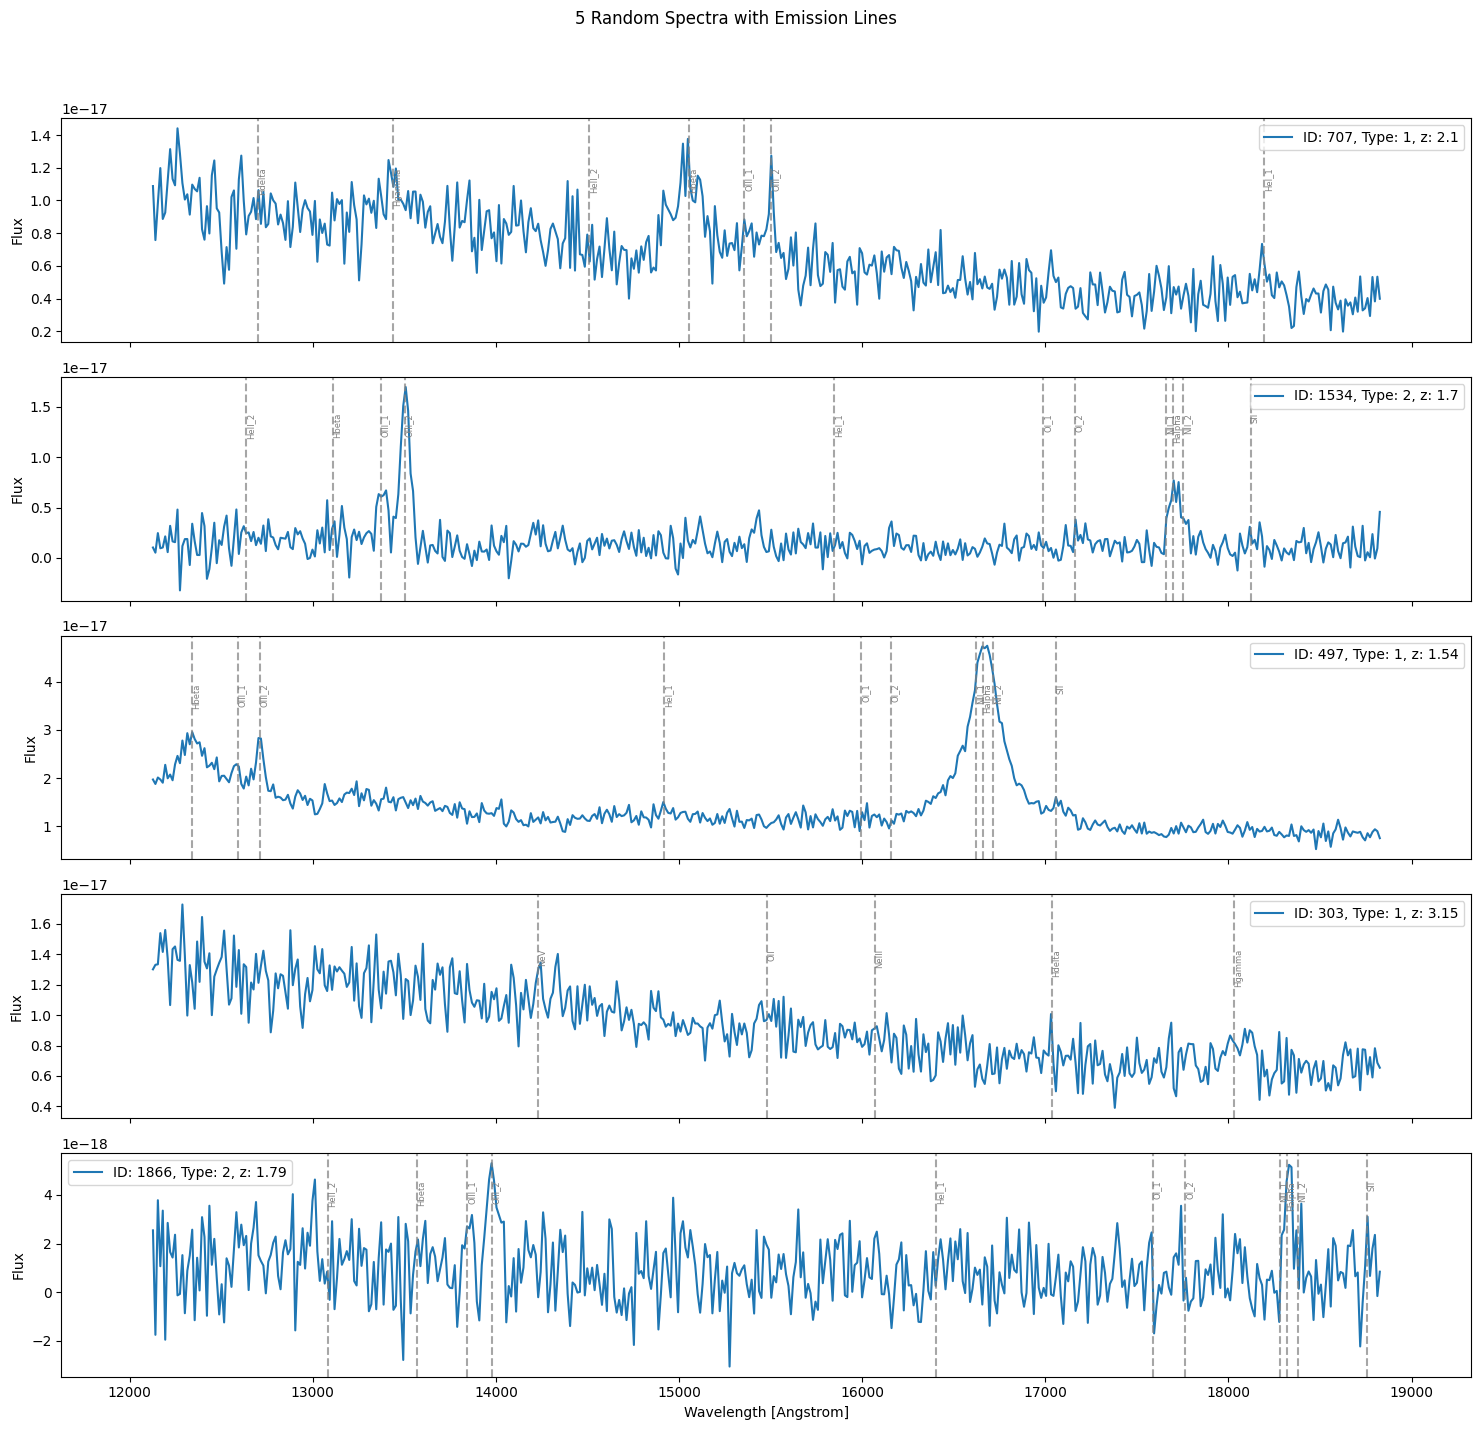

In [159]:
import matplotlib.pyplot as plt

# function to plot random spectra with controlled emission line labels
def plot_random_spectra(df, emission_line_rest, wavelength_axis, n=5):
    random_samples = df.sample(n=n)
    fig, axes = plt.subplots(n, 1, figsize=(15, 3 * n), sharex=True)

    for ax, (i, row) in zip(axes, random_samples.iterrows()):
        redshift = row['z']  # Redshift of the current spectrum
        observed_lines = {line: rest_wl * (1 + redshift) for line, rest_wl in emission_line_rest.items()}
        
        # Plot the spectrum
        ax.plot(wavelength_axis, row['spectrum'], label=f"ID: {i}, Type: {row['type']}, z: {round(row['z'], 2)}")
        ax.set_ylabel("Flux")
        ax.legend()
        
        # Set x-axis limits based on wavelength_axis range (allowing some buffer space)
        ax.set_xlim([wavelength_axis[0]-500, wavelength_axis[-1]+500])
        
        # Plot emission lines within the wavelength range and adjust text placement
        for line, obs_wl in observed_lines.items():
            if wavelength_axis[0] <= obs_wl <= wavelength_axis[-1]:  # Only plot lines within x-axis range
                ax.axvline(obs_wl, color='gray', linestyle='--', alpha=0.7)
                # Adjusting label position and font size for readability
                ax.text(obs_wl, ax.get_ylim()[1] * 0.8, line, rotation=90, verticalalignment='top',
                        fontsize=6, color='gray', clip_on=True)  # Clip text within plot bounds

    plt.xlabel("Wavelength [Angstrom]")
    plt.suptitle(f"{n} Random Spectra with Emission Lines")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# qui plotto n random spectra with emission lines overlaid and wavelength limits
plot_random_spectra(reconstructed_df, emission_line_rest, wavelength_axis, n=5)




### visualise statistics of mass and redshift according to type of object

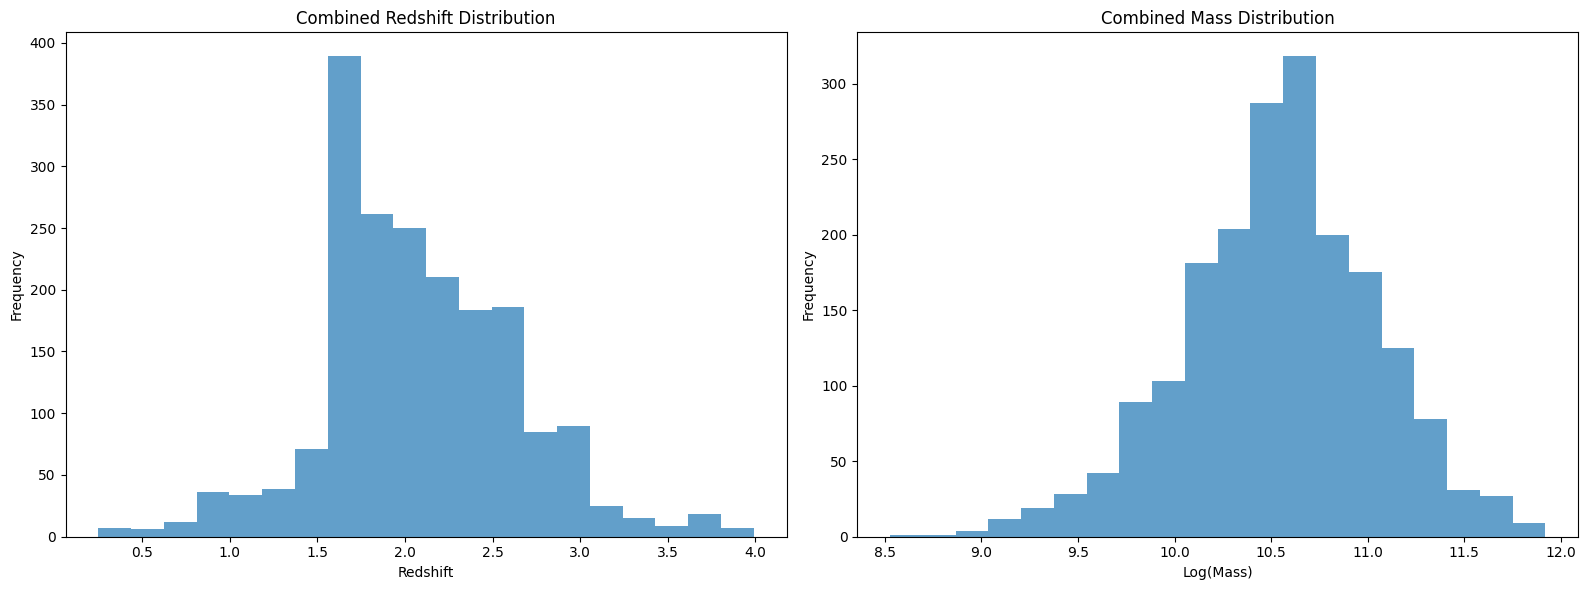

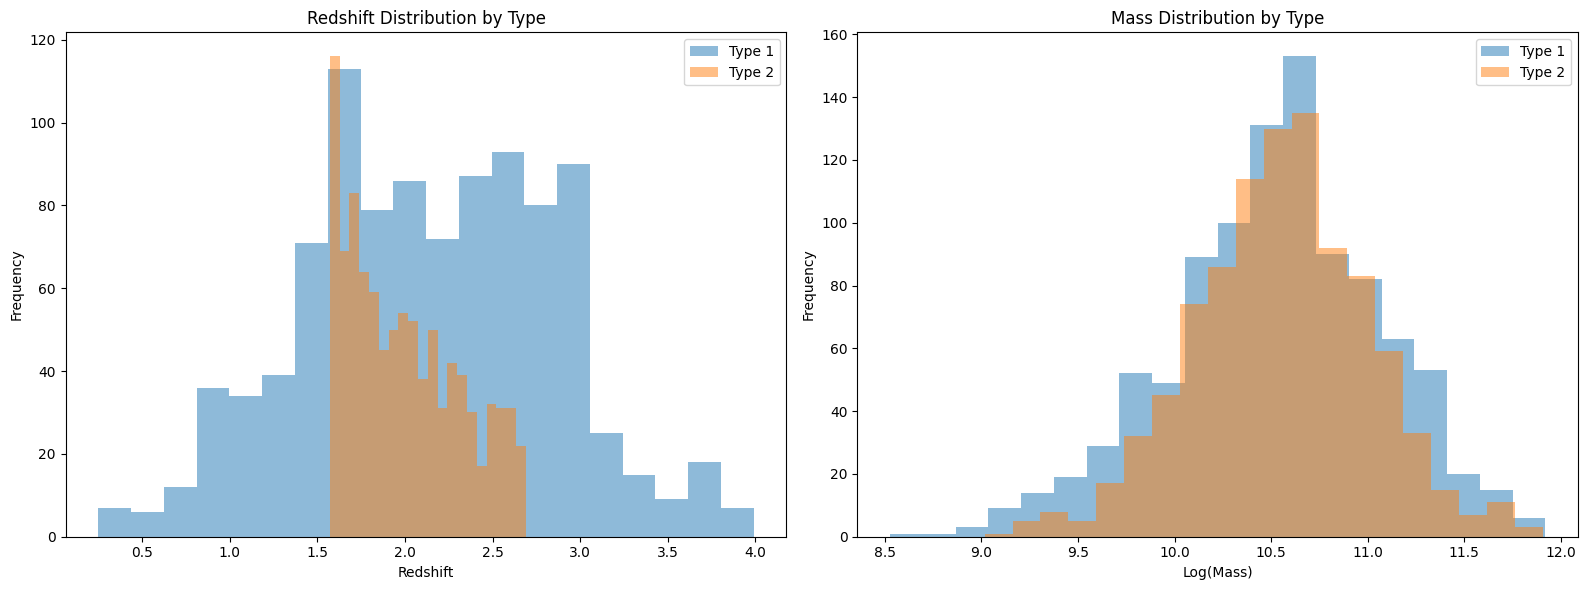

In [160]:
import matplotlib.pyplot as plt

# Combined Histograms (no division by type)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Combined histogram for redshift
axes[0].hist(reconstructed_df['z'], bins=20, alpha=0.7)
axes[0].set_xlabel("Redshift")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Combined Redshift Distribution")

# Combined histogram for log(mass)
axes[1].hist(reconstructed_df['log_m'], bins=20, alpha=0.7)
axes[1].set_xlabel("Log(Mass)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Combined Mass Distribution")

plt.tight_layout()
plt.show()

# Split Histograms by Type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Redshift histogram split by type
for t in reconstructed_df['type'].unique():
    subset = reconstructed_df[reconstructed_df['type'] == t]
    axes[0].hist(subset['z'], bins=20, alpha=0.5, label=f'Type {t}')
axes[0].set_xlabel("Redshift")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Redshift Distribution by Type")
axes[0].legend()

# Mass histogram split by type
for t in reconstructed_df['type'].unique():
    subset = reconstructed_df[reconstructed_df['type'] == t]
    axes[1].hist(subset['log_m'], bins=20, alpha=0.5, label=f'Type {t}')
axes[1].set_xlabel("Log(Mass)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Mass Distribution by Type")
axes[1].legend()

plt.tight_layout()
plt.show()


In [163]:
print(reconstructed_df['z'].min())
print(reconstructed_df['z'].max())

0.24911916255950928
3.9919240474700928
